In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [176]:
df = pd.read_csv("output.csv", skiprows=1, names=["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14", "C15", "C16", "C17", "C18", "C19", "C20", "C21", "C22", "C23", "C24", "C25"])
df.replace("-", np.nan, inplace=True)

In [177]:
valid_values = ["car", "cargo"]
filtered_df = df[df["C1"].isin(valid_values)]

In [178]:
cleaned_data = filtered_df.dropna()

In [179]:
for col in cleaned_data.columns[1:]:
    cleaned_data.loc[:, col] = pd.to_numeric(cleaned_data.loc[:, col], errors="coerce")

cleaned_data = cleaned_data.dropna()

In [180]:
cargo_data = cleaned_data[cleaned_data["C1"] == "cargo"]
car_data = cleaned_data[cleaned_data["C1"] == "car"]

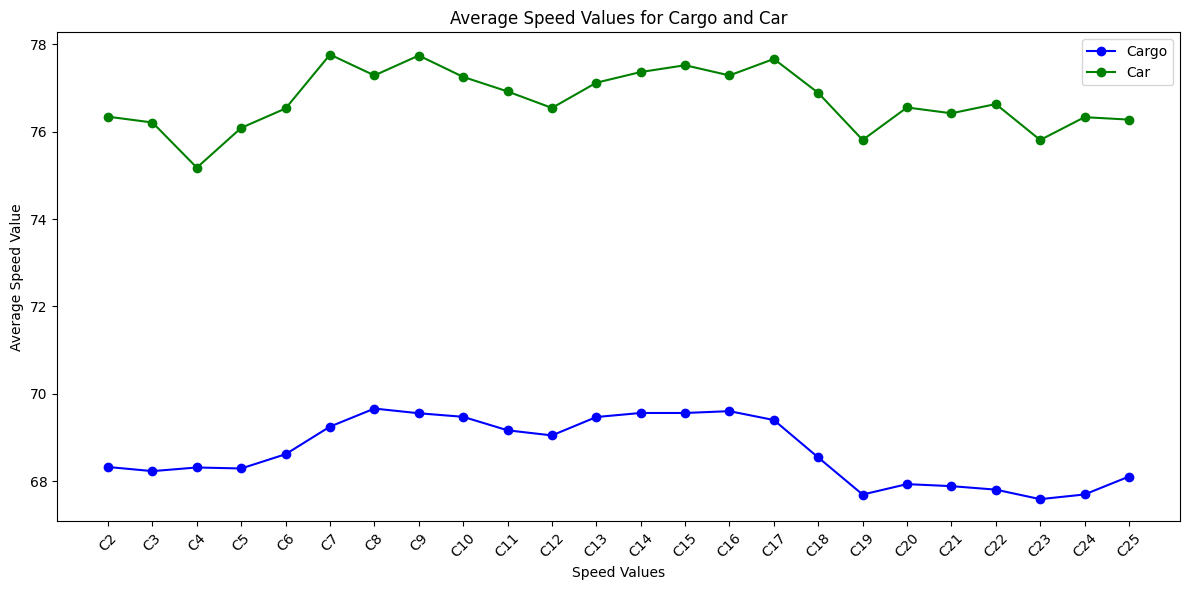

In [181]:
cargo_means = cargo_data.loc[:, "C2":"C25"].mean()
car_means = car_data.loc[:, "C2":"C25"].mean()

plt.figure(figsize=(12, 6))

plt.plot(cargo_means.index, cargo_means.values, marker="o", linestyle="-", color="b", label="Cargo")

plt.plot(car_means.index, car_means.values, marker="o", linestyle="-", color="g", label="Car")

plt.title("Average Speed Values for Cargo and Car")
plt.xlabel("Speed Values")
plt.ylabel("Average Speed Value")
plt.xticks(rotation=45)
plt.legend(labels=["Cargo", "Car"])

plt.tight_layout()
plt.show()


In [182]:
X_car = car_data.drop(["C1", "C2"], axis=1)
y_car = car_data["C2"].astype(float)
X_car_train, X_car_test, y_car_train, y_car_test = train_test_split(X_car, y_car, test_size=0.2, random_state=42)

X_cargo = cargo_data.drop(["C1", "C2"], axis=1)
y_cargo = cargo_data["C2"].astype(float)
X_cargo_train, X_cargo_test, y_cargo_train, y_cargo_test = train_test_split(X_cargo, y_cargo, test_size=0.2, random_state=42)

model_car = LinearRegression()
model_car.fit(X_car_train, y_car_train)
y_car_pred = model_car.predict(X_car_test)

mse_car = mean_squared_error(y_car_test, y_car_pred)
r2_car = r2_score(y_car_test, y_car_pred)

print("Linear Regression Metrics for Cars:")
print(f"Mean Squared Error: {mse_car}")
print(f"R^2 Score: {r2_car}")

Linear Regression Metrics for Cars:
Mean Squared Error: 28.978118091525808
R^2 Score: 0.835469898157288


In [183]:
model_cargo = LinearRegression()
model_cargo.fit(X_cargo_train, y_cargo_train)
y_cargo_pred = model_cargo.predict(X_cargo_test)

mse_cargo = mean_squared_error(y_cargo_test, y_cargo_pred)
r2_cargo = r2_score(y_cargo_test, y_cargo_pred)

print("Linear Regression Metrics for Cargo:")
print(f"Mean Squared Error: {mse_cargo}")
print(f"R^2 Score: {r2_cargo}")

Linear Regression Metrics for Cargo:
Mean Squared Error: 15.475582922689254
R^2 Score: 0.8351218669040774


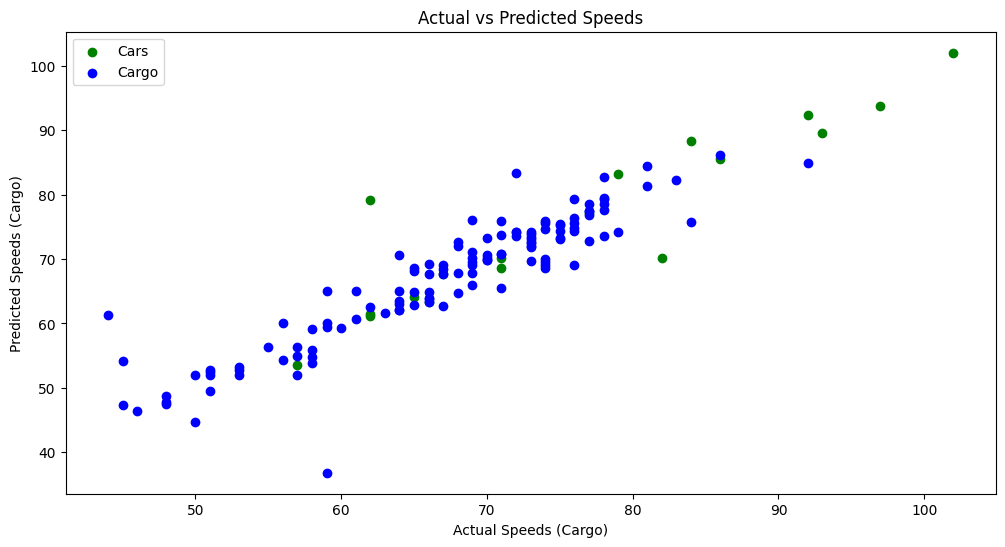

In [184]:
plt.figure(figsize=(12, 6))

plt.scatter(y_car_test, y_car_pred, color='g', label='Cars')
plt.xlabel("Actual Speeds (Cars)")
plt.ylabel("Predicted Speeds (Cars)")

plt.scatter(y_cargo_test, y_cargo_pred, color='b', label='Cargo')
plt.xlabel("Actual Speeds (Cargo)")
plt.ylabel("Predicted Speeds (Cargo)")

plt.title("Actual vs Predicted Speeds")
plt.legend()
plt.show()
